In [19]:
import warnings


warnings.filterwarnings("ignore", category=FutureWarning)


In [20]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [21]:
data = pd.read_csv("updated_dataset.csv")


In [22]:
X = data.drop(columns=['price'])  
y = data['price']  

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
dt_regressor = DecisionTreeRegressor(random_state=42)


dt_regressor.fit(X_train, y_train)


y_pred = dt_regressor.predict(X_test)




In [25]:
# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree

# # Assuming dt_regressor is already fitted
# plt.figure(figsize=(20, 10))  # Adjust the size of the plot
# plot_tree(dt_regressor, filled=True, feature_names=X_train.columns, rounded=True)
# plt.show()


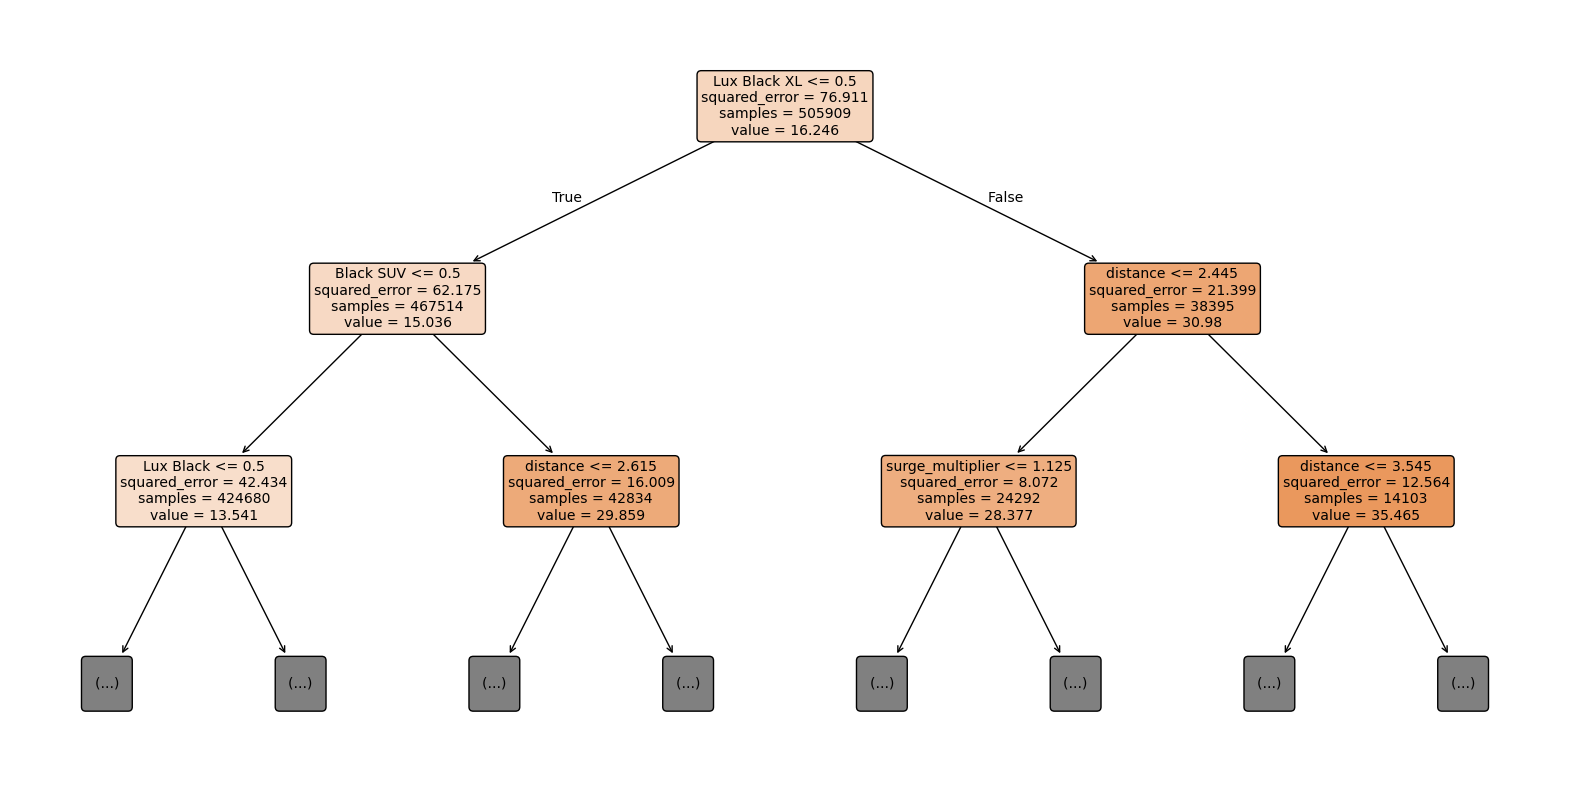

In [26]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plotting the first 3 levels of the tree and storing the plot in a variable
fig, ax = plt.subplots(figsize=(20, 10))  # Adjust the size of the plot
tree_plot = plot_tree(dt_regressor, max_depth=2, filled=True, feature_names=X_train.columns, rounded=True, ax=ax)

# Display the plot
plt.show()


In [27]:
# Compute R-squared (R^2) score
from sklearn.metrics import r2_score,mean_absolute_percentage_error
r_squared = r2_score(y_test, y_pred)
print(f'R-squared (R^2) Score: {r_squared}')
mape = mean_absolute_percentage_error(y_test,y_pred)
print(f'Mean Abs Percent Error:{mape}');

R-squared (R^2) Score: 0.9648416192037758
Mean Abs Percent Error:0.08266659129607166


In [28]:
from sklearn.metrics import *
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

1.101196147780439
2.703001076288161


Checking for Overfit

In [29]:
y_train_pred =dt_regressor.predict(X_train)
trainr2 = r2_score(y_train_pred,y_train)
trainr2

0.9652143491227209

Train R2 = 0.9664

Test R2 = 0.9653

Hence the model is correctly fit

## PREDICTION

In [ ]:

dist = float(input("Enter The Distance: "))
sur = float(input("Enter Surge Multiplier: "))

cab_types = [
    "Black", "Black SUV", "SUV", "Lux", "Lux Black", "Lux Black XL",
    "Lyft", "Lyft XL", "Shared", "UberPool", "UberX", "UberXL", "WAV"
]
print("Cab Types:")
for idx, cab in enumerate(cab_types):
    print(f"{idx}: {cab}")

cab_index = int(input("Enter Cab Type Number (0-12): "))
while not (0 <= cab_index < len(cab_types)):
    cab_index = int(input("Invalid input. Enter Cab Type Number (0-12): "))

company = int(input("Enter 1 for Uber and 0 for Lyft: "))
while company not in [0, 1]:
    company = int(input("Invalid input. Enter 1 for Uber and 0 for Lyft: "))

cab_one_hot = [0] * len(cab_types)
cab_one_hot[cab_index] = 1

company_one_hot = [0, 0]
company_one_hot[company] = 1

input_features = [dist, sur] + cab_one_hot + company_one_hot

out = dt_regressor.predict([input_features])
print("Predicted Cab Price:", out[0])